### Spam Mail Detection

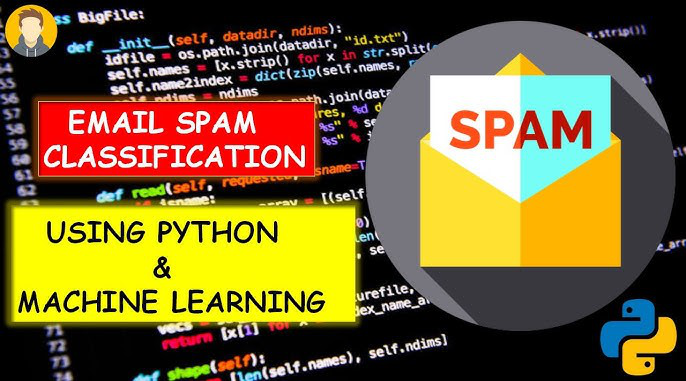

In [1]:
from PIL import Image

Image.open("C:/Users/satya/Downloads/spam-img 2.jpg")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\satya\Downloads\archive (3)\spam mail.csv")
df

,Category,Masseges
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### 1.Data Cleaning

In [6]:
df.shape

(5572, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Masseges  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['Category'] = encoder.fit_transform(df['Category'])

In [10]:
df.isnull().sum()

Category    0
Masseges    0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates()

In [15]:
df.shape

(5169, 2)

### 2.EDA

In [19]:
df.head(10)

,Category,Masseges
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [26]:
df['Category'].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

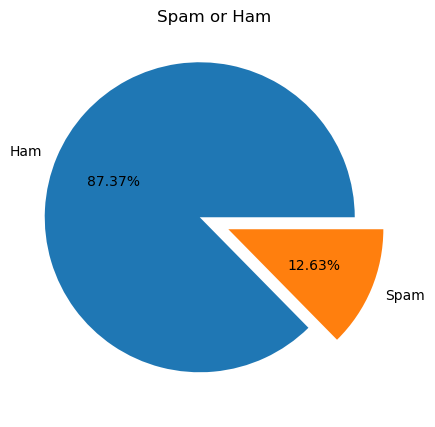

In [29]:
plt.figure(figsize=(5,6))
plt.pie(df['Category'].value_counts(),labels=["Ham","Spam"],autopct="%0.2f%%",explode=[0.1,0.1])
plt.title('Spam or Ham')
plt.show()

In [30]:
import nltk #Natural Language Toolkit

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
df['num_characters']=df['Masseges'].apply(len)

In [34]:
df

,Category,Masseges,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [35]:
 df['Num_Words']=df['Masseges'].apply( lambda  x : len(nltk.word_tokenize(x))  )

In [36]:
df

,Category,Masseges,num_characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [37]:
df['Num_Sentence']=df['Masseges'].apply( lambda  x : len(nltk.sent_tokenize(x)))

In [38]:
df

,Category,Masseges,num_characters,Num_Words,Num_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [39]:
df[['num_characters','Num_Words','Num_Sentence']].describe()

,num_characters,Num_Words,Num_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
df[df['Category'] == 0][['num_characters','Num_Words','Num_Sentence']].describe()  

,num_characters,Num_Words,Num_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [45]:
df[df['Category'] == 1][['num_characters','Num_Words','Num_Sentence']].describe()  

,num_characters,Num_Words,Num_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

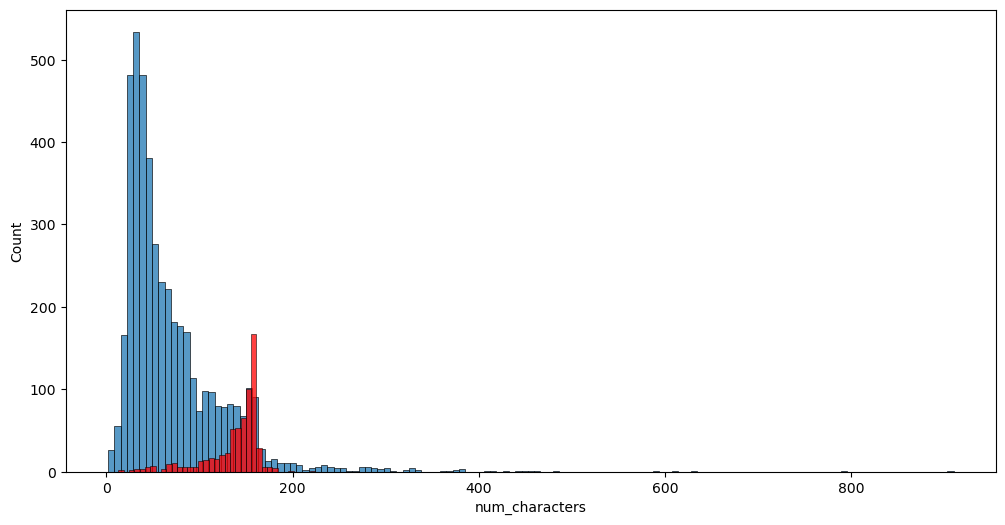

In [46]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'] , color= 'red')

<Axes: xlabel='Num_Words', ylabel='Count'>

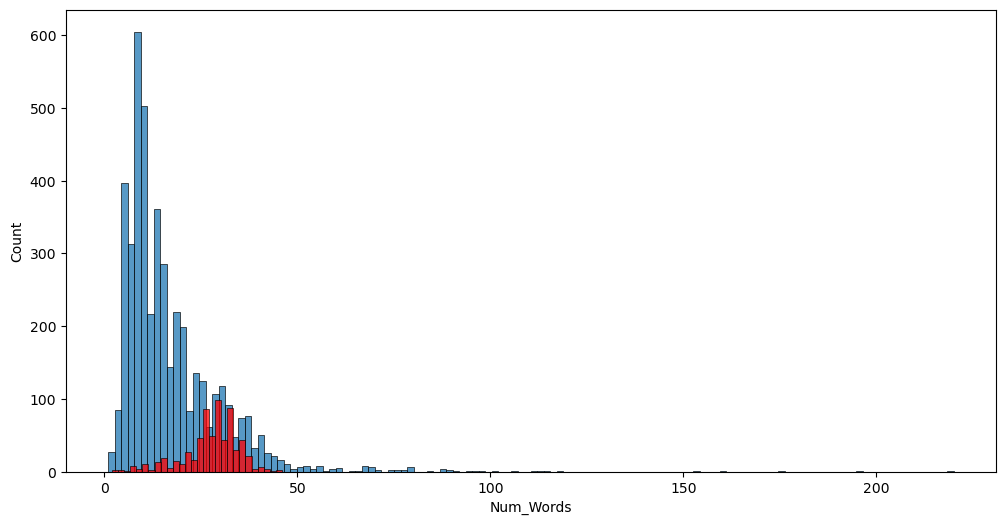

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['Num_Words'])
sns.histplot(df[df['Category'] == 1]['Num_Words'] , color= 'red')

<Axes: xlabel='num_characters', ylabel='Count'>

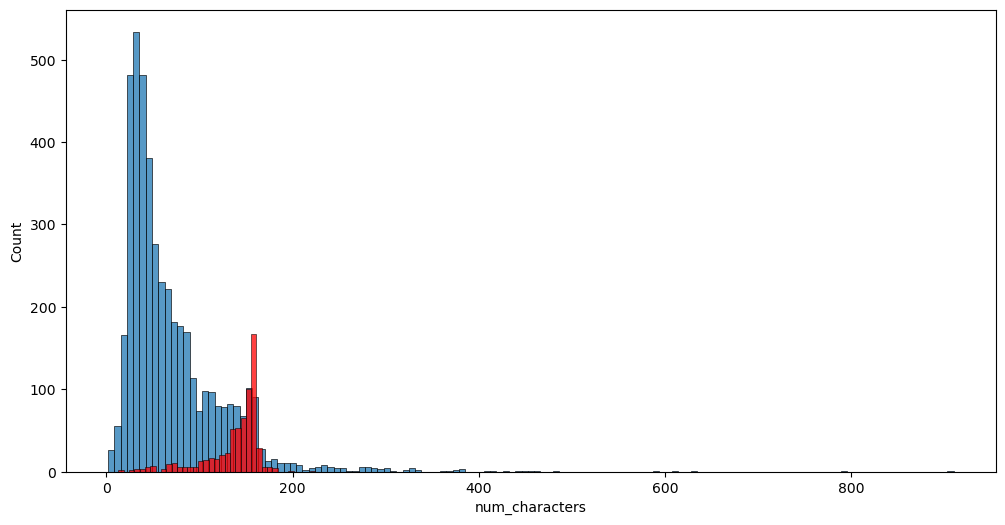

In [48]:
# change num_characters to num_sentence
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'] , color= 'red')

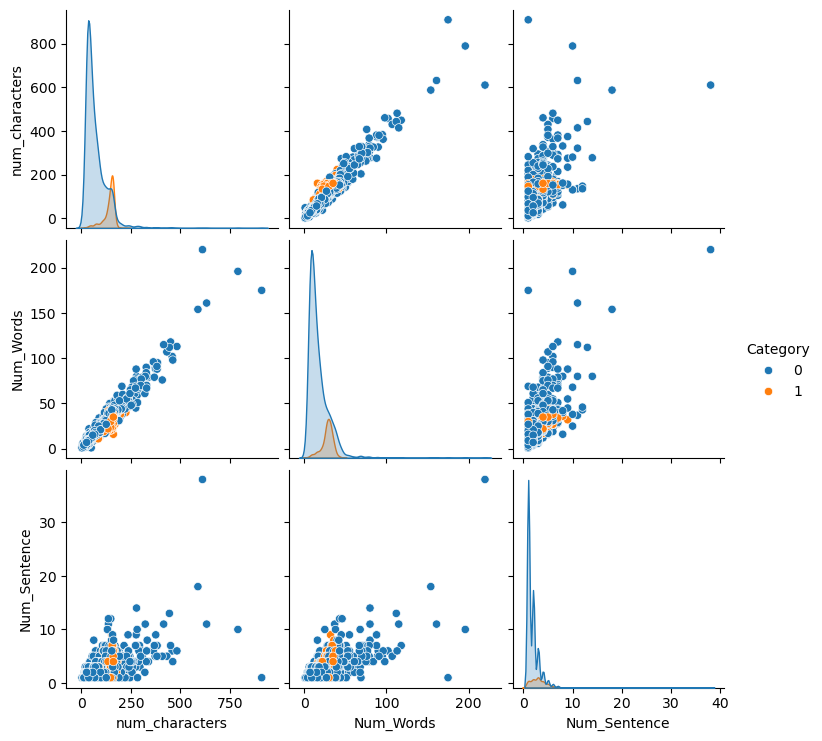

In [51]:
sns.pairplot(df,hue='Category')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        5169 non-null   int32 
 1   Masseges        5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   Num_Words       5169 non-null   int64 
 4   Num_Sentence    5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [58]:
df.select_dtypes(int).corr()

,Category,num_characters,Num_Words,Num_Sentence
Category,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
Num_Words,0.262912,0.965760,1.000000,0.679971
Num_Sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

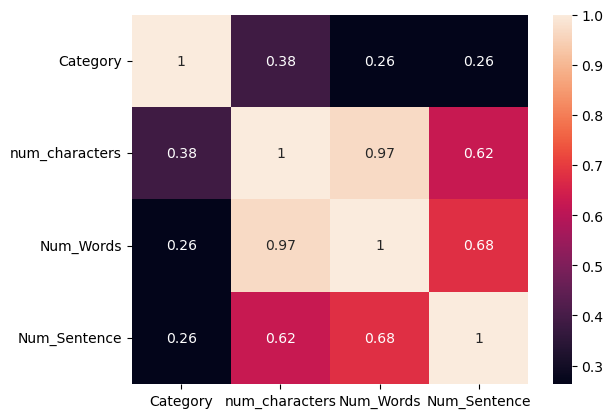

In [59]:
sns.heatmap(df.select_dtypes(int).corr(),annot=True)

### 3.Data Preprocessing
    Lower Case
    Tokenization
    Removing special Characters 
    Removing stop words and punctuation 
    Stemming

In [62]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\satya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [65]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Dancing')

'danc'

In [68]:
def transfrom_text(Masseges ):
    Masseges = Masseges.lower()
    Masseges = nltk.word_tokenize(Masseges )

    y=[]
    for i in Masseges :
        if i.isalnum():
            y.append(i)

    Masseges = y[:]
    y.clear()
    for i in Masseges :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Masseges =y[:]
    y.clear()
    for i in Masseges:
        y.append(ps.stem(i))
            
    return " " .join(y)


In [69]:
transfrom_text( 
"I'm still looking for a car to buy. And have not gone 4the driving test yet."
)

'still look car buy gone 4the drive test yet'

In [70]:
df['Masseges'][101]

"I'm still looking for a car to buy. And have not gone 4the driving test yet."

In [71]:
df['transformed_text']=df['Masseges'].apply(transfrom_text)

In [72]:
df.head(10)

,Category,Masseges,num_characters,Num_Words,Num_Sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


### import word cloud

In [74]:
pip install wordCloud

Note: you may need to restart the kernel to use updated packages.


In [75]:
from wordcloud import WordCloud
wc = WordCloud( width=700,height=400,background_color='white',min_font_size=4
)

In [76]:
Spam_wc=wc.generate(df[df['Category']==1]['transformed_text'].str.cat(sep= " "))

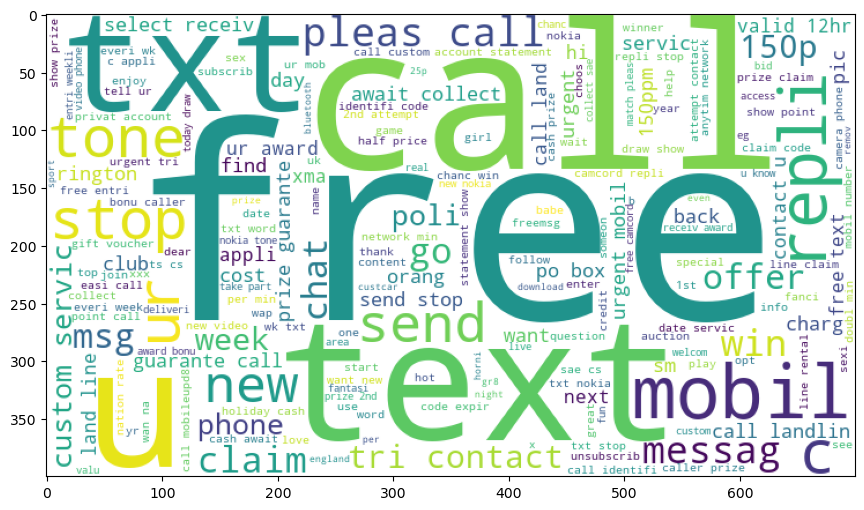

In [77]:
plt.figure(figsize=(12,6))
plt.imshow(Spam_wc)

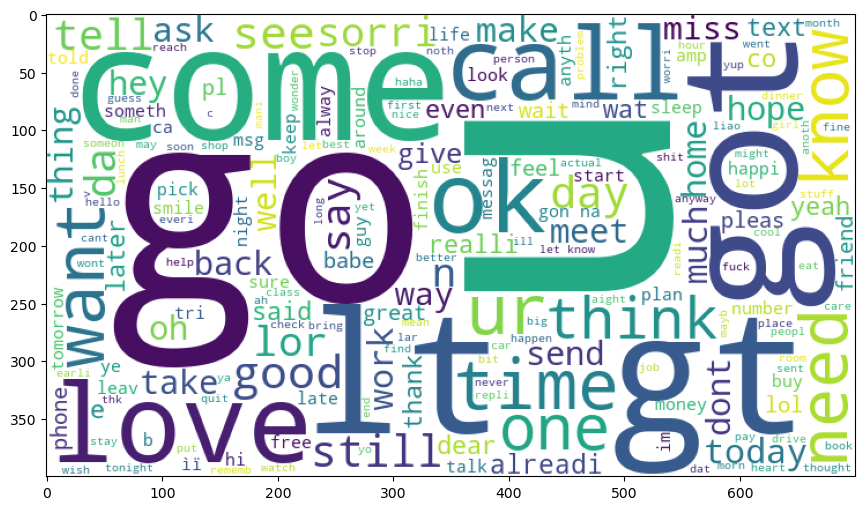

In [78]:
ham_wc=wc.generate(df[df['Category']==0]['transformed_text'].str.cat(sep= " "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [79]:
df.head(10)

,Category,Masseges,num_characters,Num_Words,Num_Sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


### Spam Corpus

In [81]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [82]:
len(spam_corpus)

9939

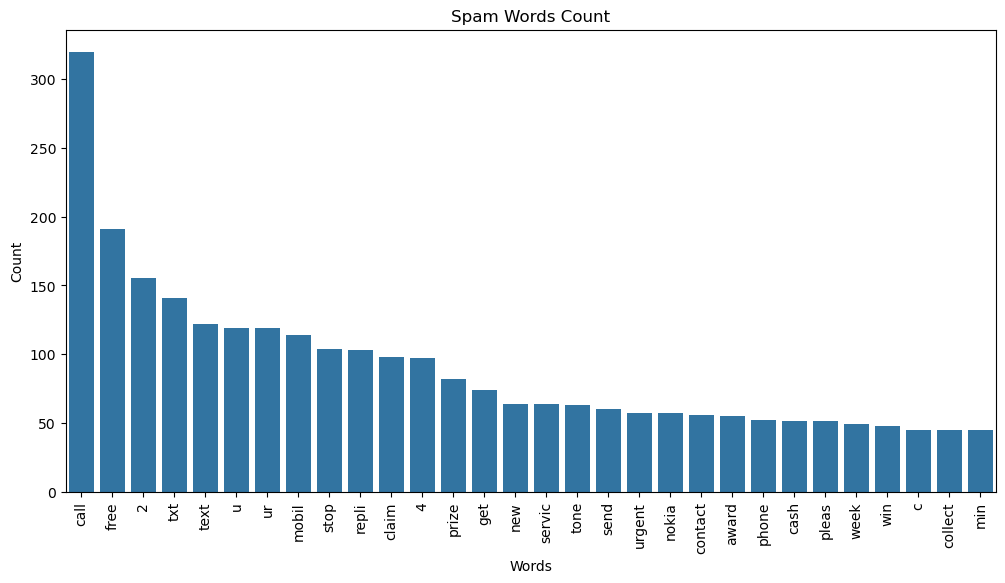

In [83]:
from collections import Counter
plt.figure(figsize=(12,6))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Spam Words Count")
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

### Ham corpus

In [88]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [93]:
len(ham_corpus)

35404

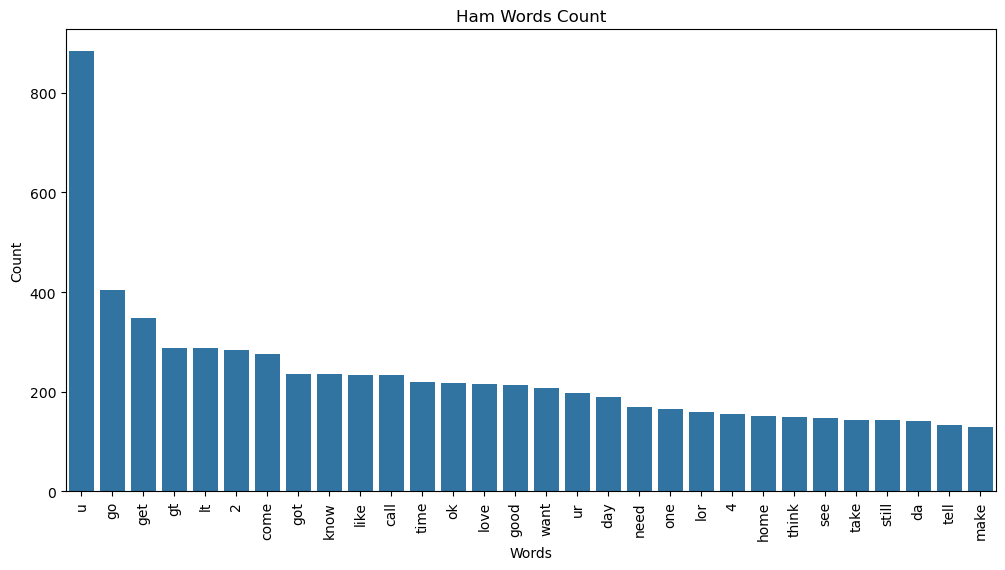

In [98]:
from collections import Counter
plt.figure(figsize=(12,6))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.title("Ham Words Count")
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

## 4.Model building

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [101]:
x=cv.fit_transform(df['transformed_text']).toarray()

In [102]:
x.shape

(5169, 6708)

In [103]:
y=df['Category'].values

In [104]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [106]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [107]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [108]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred1))
print("Prescision :",precision_score(y_test,y_pred1))

Accuracy : 0.8800773694390716
Prescision : 0.5315315315315315


In [109]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred2))
print("Prescision :",precision_score(y_test,y_pred2))

Accuracy : 0.9642166344294004
Prescision : 0.8344370860927153


In [110]:
bnb.fit(X_train,y_train)
y_pred3=gnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred3))
print("Prescision :",precision_score(y_test,y_pred3))

Accuracy : 0.8800773694390716
Prescision : 0.5315315315315315


In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfdif=TfidfVectorizer(max_features=3000)

In [112]:
x=tfdif.fit_transform(df['transformed_text']).toarray()

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [115]:
gnb.fit(X_train,y_train)
y_pred4=gnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred4))
print("Prescision :",precision_score(y_test,y_pred4))

Accuracy : 0.8694390715667312
Prescision : 0.5068493150684932


In [116]:
mnb.fit(X_train,y_train)
y_pred5=mnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred5))
print("Prescision :",precision_score(y_test,y_pred5))

Accuracy : 0.9709864603481625
Prescision : 1.0


In [117]:
bnb.fit(X_train,y_train)
y_pred6=bnb.predict(X_test)
print("Accuracy :",accuracy_score(y_test,y_pred6))
print("Prescision :",precision_score(y_test,y_pred6))

Accuracy : 0.9835589941972921
Prescision : 0.991869918699187


In [118]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [120]:
lrc = LogisticRegression(solver='liblinear')
svm = SVC(kernel='sigmoid')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bgc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
knc = KNeighborsClassifier()
xgb = XGBClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [121]:
from sklearn.metrics import accuracy_score,precision_score

In [122]:
clfs = {
    'LR' : lrc, 
    'SVC' : svm,
    'NB' : mnb,
    'DT' : dtc,
    'RF' : rfc,
    'AdaBoost': abc,
    'Bgc' : bgc,
    'ETC' : etc,
    'XGB' : xgb,
    'GBDT' : gbc
}

In [123]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Accuracy = accuracy_score(y_test,y_pred)
    Prescision = precision_score(y_test,y_pred)

    return Accuracy,Prescision

In [124]:
train_classifier(svm,X_train,X_test,y_train,y_test)

(0.9758220502901354, 0.9747899159663865)

In [125]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    Current_accuracy,Current_precision=train_classifier(clf,X_train,X_test,y_train,y_test)

    print('for',name)
    print('Accuracy',Current_accuracy)
    print('Precision',Current_precision)

    accuracy_scores.append(Current_accuracy)
    precision_scores.append(Current_precision)

for LR
Accuracy 0.9564796905222437
Precision 0.979381443298969
for SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
for NB
Accuracy 0.9709864603481625
Precision 1.0
for DT
Accuracy 0.9294003868471954
Precision 0.8282828282828283
for RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829
for AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
for Bgc
Accuracy 0.9584139264990329
Precision 0.8682170542635659
for ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
for XGB
Accuracy 0.9671179883945842
Precision 0.9262295081967213
for GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192


In [126]:
performance_df=pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores ,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [127]:
performance_df

,Algorithms,Accuracy,Precision
2,NB,0.970986,1.000000
4,RF,0.975822,0.982906
0,LR,0.956480,0.979381
1,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
5,AdaBoost,0.960348,0.929204
8,XGB,0.967118,0.926230
9,GBDT,0.946809,0.919192
6,Bgc,0.958414,0.868217
3,DT,0.929400,0.828283


In [128]:
performance_df1=pd.melt(performance_df,id_vars="Algorithms")
performance_df1

,Algorithms,variable,value
0,NB,Accuracy,0.970986
1,RF,Accuracy,0.975822
2,LR,Accuracy,0.956480
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,AdaBoost,Accuracy,0.960348
6,XGB,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,Bgc,Accuracy,0.958414
9,DT,Accuracy,0.929400


<Figure size 1200x900 with 0 Axes>

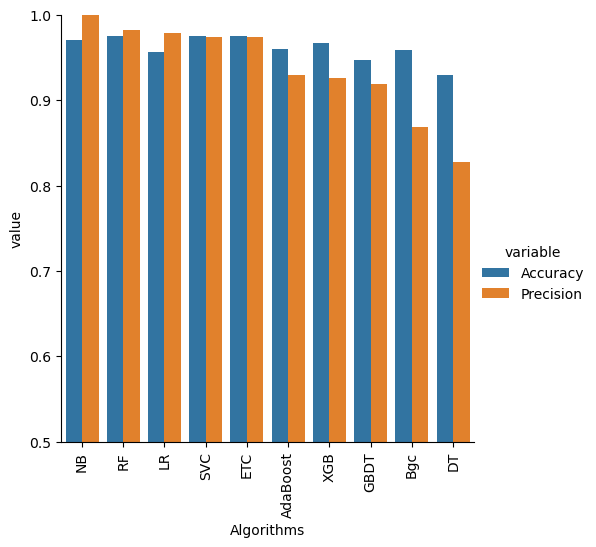

In [129]:
plt.figure(figsize=(12,9))
sns.catplot(x='Algorithms',y='value',
           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model imporing 

In [131]:
temp_df =pd.DataFrame({'Algorithms':clfs.keys(),'Accury_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [132]:
performance_df.merge(temp_df,on='Algorithms')

,Algorithms,Accuracy,Precision,Accury_max_ft_3000,Precision_max_ft_3000
0,NB,0.970986,1.000000,0.970986,1.000000
1,RF,0.975822,0.982906,0.975822,0.982906
2,LR,0.956480,0.979381,0.956480,0.979381
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,AdaBoost,0.960348,0.929204,0.960348,0.929204
6,XGB,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192
8,Bgc,0.958414,0.868217,0.958414,0.868217
9,DT,0.929400,0.828283,0.929400,0.828283


In [133]:
from sklearn.ensemble import VotingClassifier

Voting=VotingClassifier(estimators=[('LR' , lrc ),('SVC' , svm),('RF' , rfc)])

In [134]:
Voting.fit(X_train,y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(solver='liblinear')),
                             ('SVC', SVC(kernel='sigmoid')),
                             ('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))])

In [96]:
y_pred=Voting.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))

Accuracy: 0.9758220502901354
Precision: 0.9829059829059829
